In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
np.random.seed(123)

In [2]:
df = pd.read_excel('../event_class.xlsx', sheet_name=0, header=0)
df.head()
df.shape

(207, 26)

In [3]:
df.shape

(207, 26)

In [4]:
print('"event" class has a total of {} rows'.format(df.query('classifier == 1').shape[0]))
print('"non-event" class has a total of {} rows'.format(df.query('classifier == 0').shape[0]))

"event" class has a total of 38 rows
"non-event" class has a total of 169 rows


In [5]:
df = df.drop(labels='ECG utilizzato', axis=1)

In [6]:
sex_le = LabelEncoder()
sex_label = sex_le.fit_transform(df['Sex'])
df['Sex'] = sex_label
df.head()

Sex   Age   FC  PRint  QRSaxis  QRSwidDII  QRSwidV1  QRSwidV2  QRSwidV6  \
0    1  47.0   66  140.0     30.0       80.0        90       120      90.0   
1    1  47.0   67  160.0     30.0       80.0        90        90      80.0   
2    0  41.0   75  170.0     60.0       80.0        80        90      80.0   
3    1  28.0  115  160.0     90.0      100.0       100       100     100.0   
4    1  54.0   83  140.0    -30.0       90.0        80        80      90.0   

   QTintV5  ...  JelevV1  JelevV2  SwidDI  SlenDI  RwidaVR  RlenaVR  Type1aVR  \
0    400.0  ...      0.0     0.10    0.00     0.0      0.0      0.0       0.0   
1    400.0  ...      0.1     0.10    0.00     0.0      0.0      0.0       0.0   
2    400.0  ...      0.0     0.00    0.20    40.0      0.2     40.0       0.0   
3    340.0  ...      0.0     0.10    0.20    30.0      0.2     30.0       0.0   
4    360.0  ...      0.1     0.15    0.05    20.0      0.3     30.0       0.0   

   Type1naVRlimb  fQRS  classifier  
0            0.0   0.0           0  
1            0.0   0.0           0  
2            0.0   0.0           0  
3            0.0   0.0           0  
4            0.0   1.0           0  

[5 rows x 25 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            207 non-null    int64  
 1   Age            195 non-null    float64
 2   FC             207 non-null    int64  
 3   PRint          206 non-null    float64
 4   QRSaxis        171 non-null    float64
 5   QRSwidDII      206 non-null    float64
 6   QRSwidV1       207 non-null    int64  
 7   QRSwidV2       207 non-null    int64  
 8   QRSwidV6       206 non-null    float64
 9   QTintV5        206 non-null    float64
 10  QTintV2        207 non-null    int64  
 11  cQTintV5       206 non-null    float64
 12  cQTintV2       207 non-null    int64  
 13  TpeakTendV2    169 non-null    float64
 14  JTendV2        207 non-null    int64  
 15  JelevV1        205 non-null    float64
 16  JelevV2        206 non-null    float64
 17  SwidDI         204 non-null    float64
 18  SlenDI    

In [8]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['PRint'].fillna((df['PRint'].mode()[0]), inplace=True)
df['QRSaxis'].fillna((df['QRSaxis'].mode()[0]), inplace=True)
df['QRSwidDII'].fillna((df['QRSwidDII'].median()), inplace=True)
df['QRSwidV6'].fillna((df['QRSwidV6'].median()), inplace=True)
df['QTintV5'].fillna((df['QTintV5'].median()), inplace=True)
df['cQTintV5'].fillna((df['cQTintV5'].median()), inplace=True)
df['TpeakTendV2'].fillna((df['TpeakTendV2'].mode()[0]), inplace=True)
df['JelevV1'].fillna((df['JelevV1'].mode()[0]), inplace=True)
df['JelevV2'].fillna((df['JelevV2'].mode()[0]), inplace=True)
df['SwidDI'].fillna((df['SwidDI'].median()), inplace=True)
df['SlenDI'].fillna((df['SlenDI'].median()), inplace=True)
df['RwidaVR'].fillna((df['RwidaVR'].median()), inplace=True)
df['Type1aVR'] = df['Type1aVR'].fillna(0.5)
df['Type1naVRlimb'] = df['Type1naVRlimb'].fillna(0.5)
df['fQRS'] = df['fQRS'].fillna(0.5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            207 non-null    int64  
 1   Age            207 non-null    float64
 2   FC             207 non-null    int64  
 3   PRint          207 non-null    float64
 4   QRSaxis        207 non-null    float64
 5   QRSwidDII      207 non-null    float64
 6   QRSwidV1       207 non-null    int64  
 7   QRSwidV2       207 non-null    int64  
 8   QRSwidV6       207 non-null    float64
 9   QTintV5        207 non-null    float64
 10  QTintV2        207 non-null    int64  
 11  cQTintV5       207 non-null    float64
 12  cQTintV2       207 non-null    int64  
 13  TpeakTendV2    207 non-null    float64
 14  JTendV2        207 non-null    int64  
 15  JelevV1        207 non-null    float64
 16  JelevV2        207 non-null    float64
 17  SwidDI         207 non-null    float64
 18  SlenDI    

In [9]:
event_df = df.query('classifier == 1')
nonevent_df = df.query('classifier == 0')

In [10]:
corr = df.corr()
corr_ev = event_df.corr()
corr_nonev = nonevent_df.corr()

<AxesSubplot:>

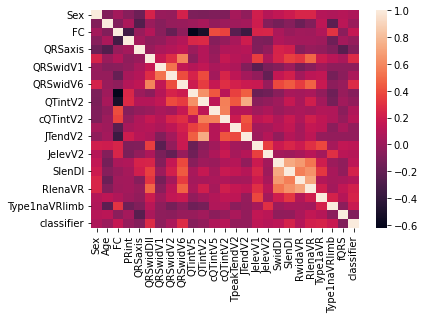

In [11]:
sns.heatmap(corr)

<AxesSubplot:>

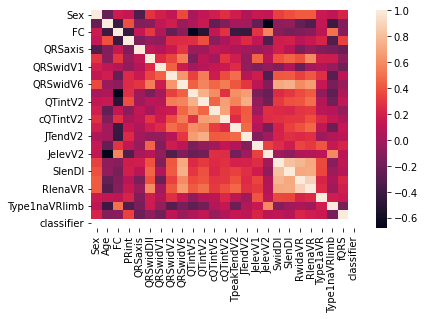

In [12]:
sns.heatmap(corr_ev)

<AxesSubplot:>

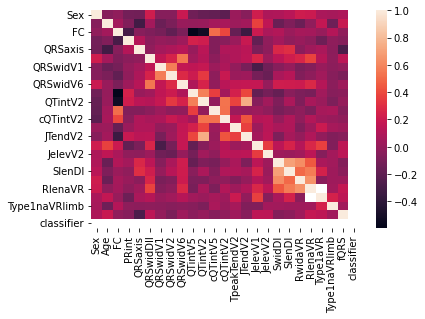

In [13]:
sns.heatmap(corr_nonev)

In [14]:
# delete features with correlation >= 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [32]:
SIG_COL = ('#F55E5A')
BKG_COL = ('#17B3B7')
LIMITS = [[0,1],[2.0,77.0],[44,187],[80.0,280.0],[-75.0,120.0],[60.0,160.0],[50,140],[70,160],[60.0,180.0],[200.0,480.0],[240,520],[336.0,544.0],[20.0,160.0],[30,380],[0.0,1.0],[0.0,1.15],[0.0,0.6],[0.0,100.0],[0.0,0.45],[0.0,100.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0,1]]


def plot_column_mod(a, col_sig, col_bkg, nbins, log=False):
   

    # min_feat = col_sig.min() if col_sig.min() <= col_bkg.min() else col_bkg.min()
    # max_feat = col_sig.max() if col_sig.max() >= col_bkg.max() else col_bkg.max()
    # print(min_feat, max_feat)

    # sig = col_sig[(col_sig > xlim[0]-5e-3) & (col_sig < xlim[1]+5e-3)]
    # bkg = col_bkg[(col_bkg > xlim[0]-5e-3) & (col_bkg < xlim[1]+5e-3)]

    a.hist(col_sig, weights=np.ones(len(col_sig)) / len(col_sig), bins=nbins, log=log, label='event', alpha=0.7, color=SIG_COL, antialiased=True, histtype = 'stepfilled')
    a.hist(col_bkg, weights=np.ones(len(col_bkg)) / len(col_bkg), bins=nbins, log=log, label='control', alpha=0.7, color=BKG_COL, antialiased=True, histtype = 'stepfilled')
    
    

In [33]:
# fig = plt.figure(figsize=(20, 25))
# j = 0
# for i in range(1,25):
#     plt.subplot(6, 4, j+1)
#     j += 1
#     sns.displot(data=event_df[i], x=df.columns[i], hue='classifier', kde=True, palette='Set2', label='event')
#     sns.displot(data=nonevent_df[i], x=df.columns[i], hue='classifier', kde=True, palette='Set2', label='control')
#     plt.legend(loc='best')
# fig.suptitle('Event/non event classification')
# fig.tight_layout()
# fig.subplots_adjust(top=0.95)
# plt.show()

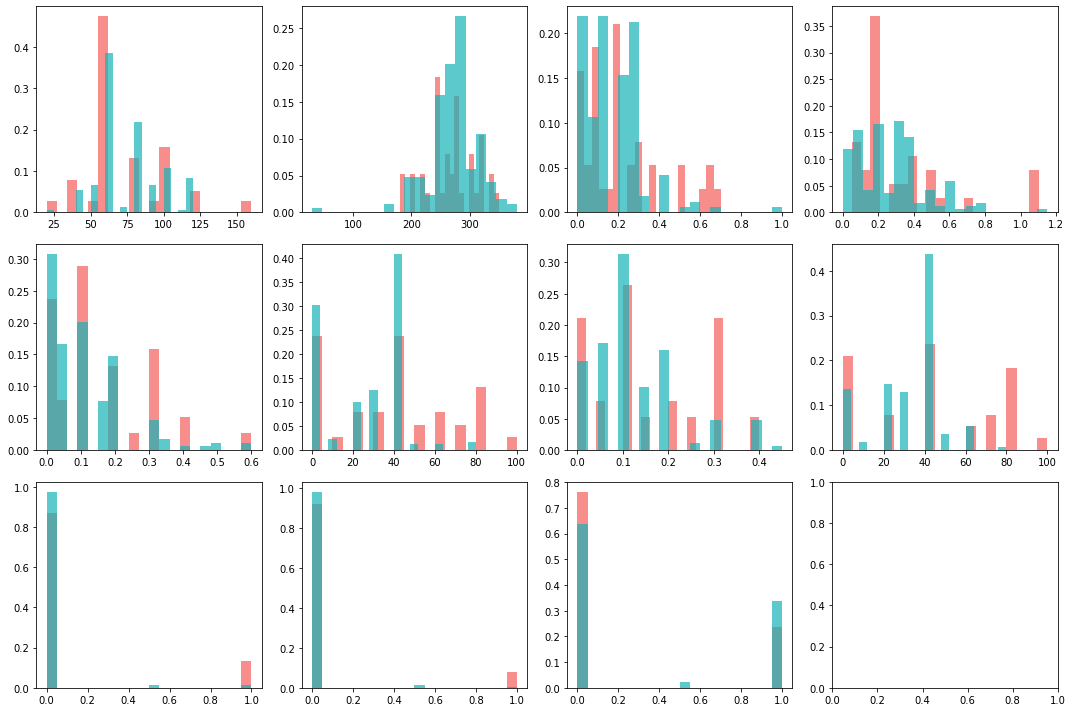

In [34]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for axs, feat in zip(axes.flatten(), df.columns[13:24]):
    
    plot_column_mod(axs, event_df[feat], nonevent_df[feat], 20)

    fig.tight_layout()

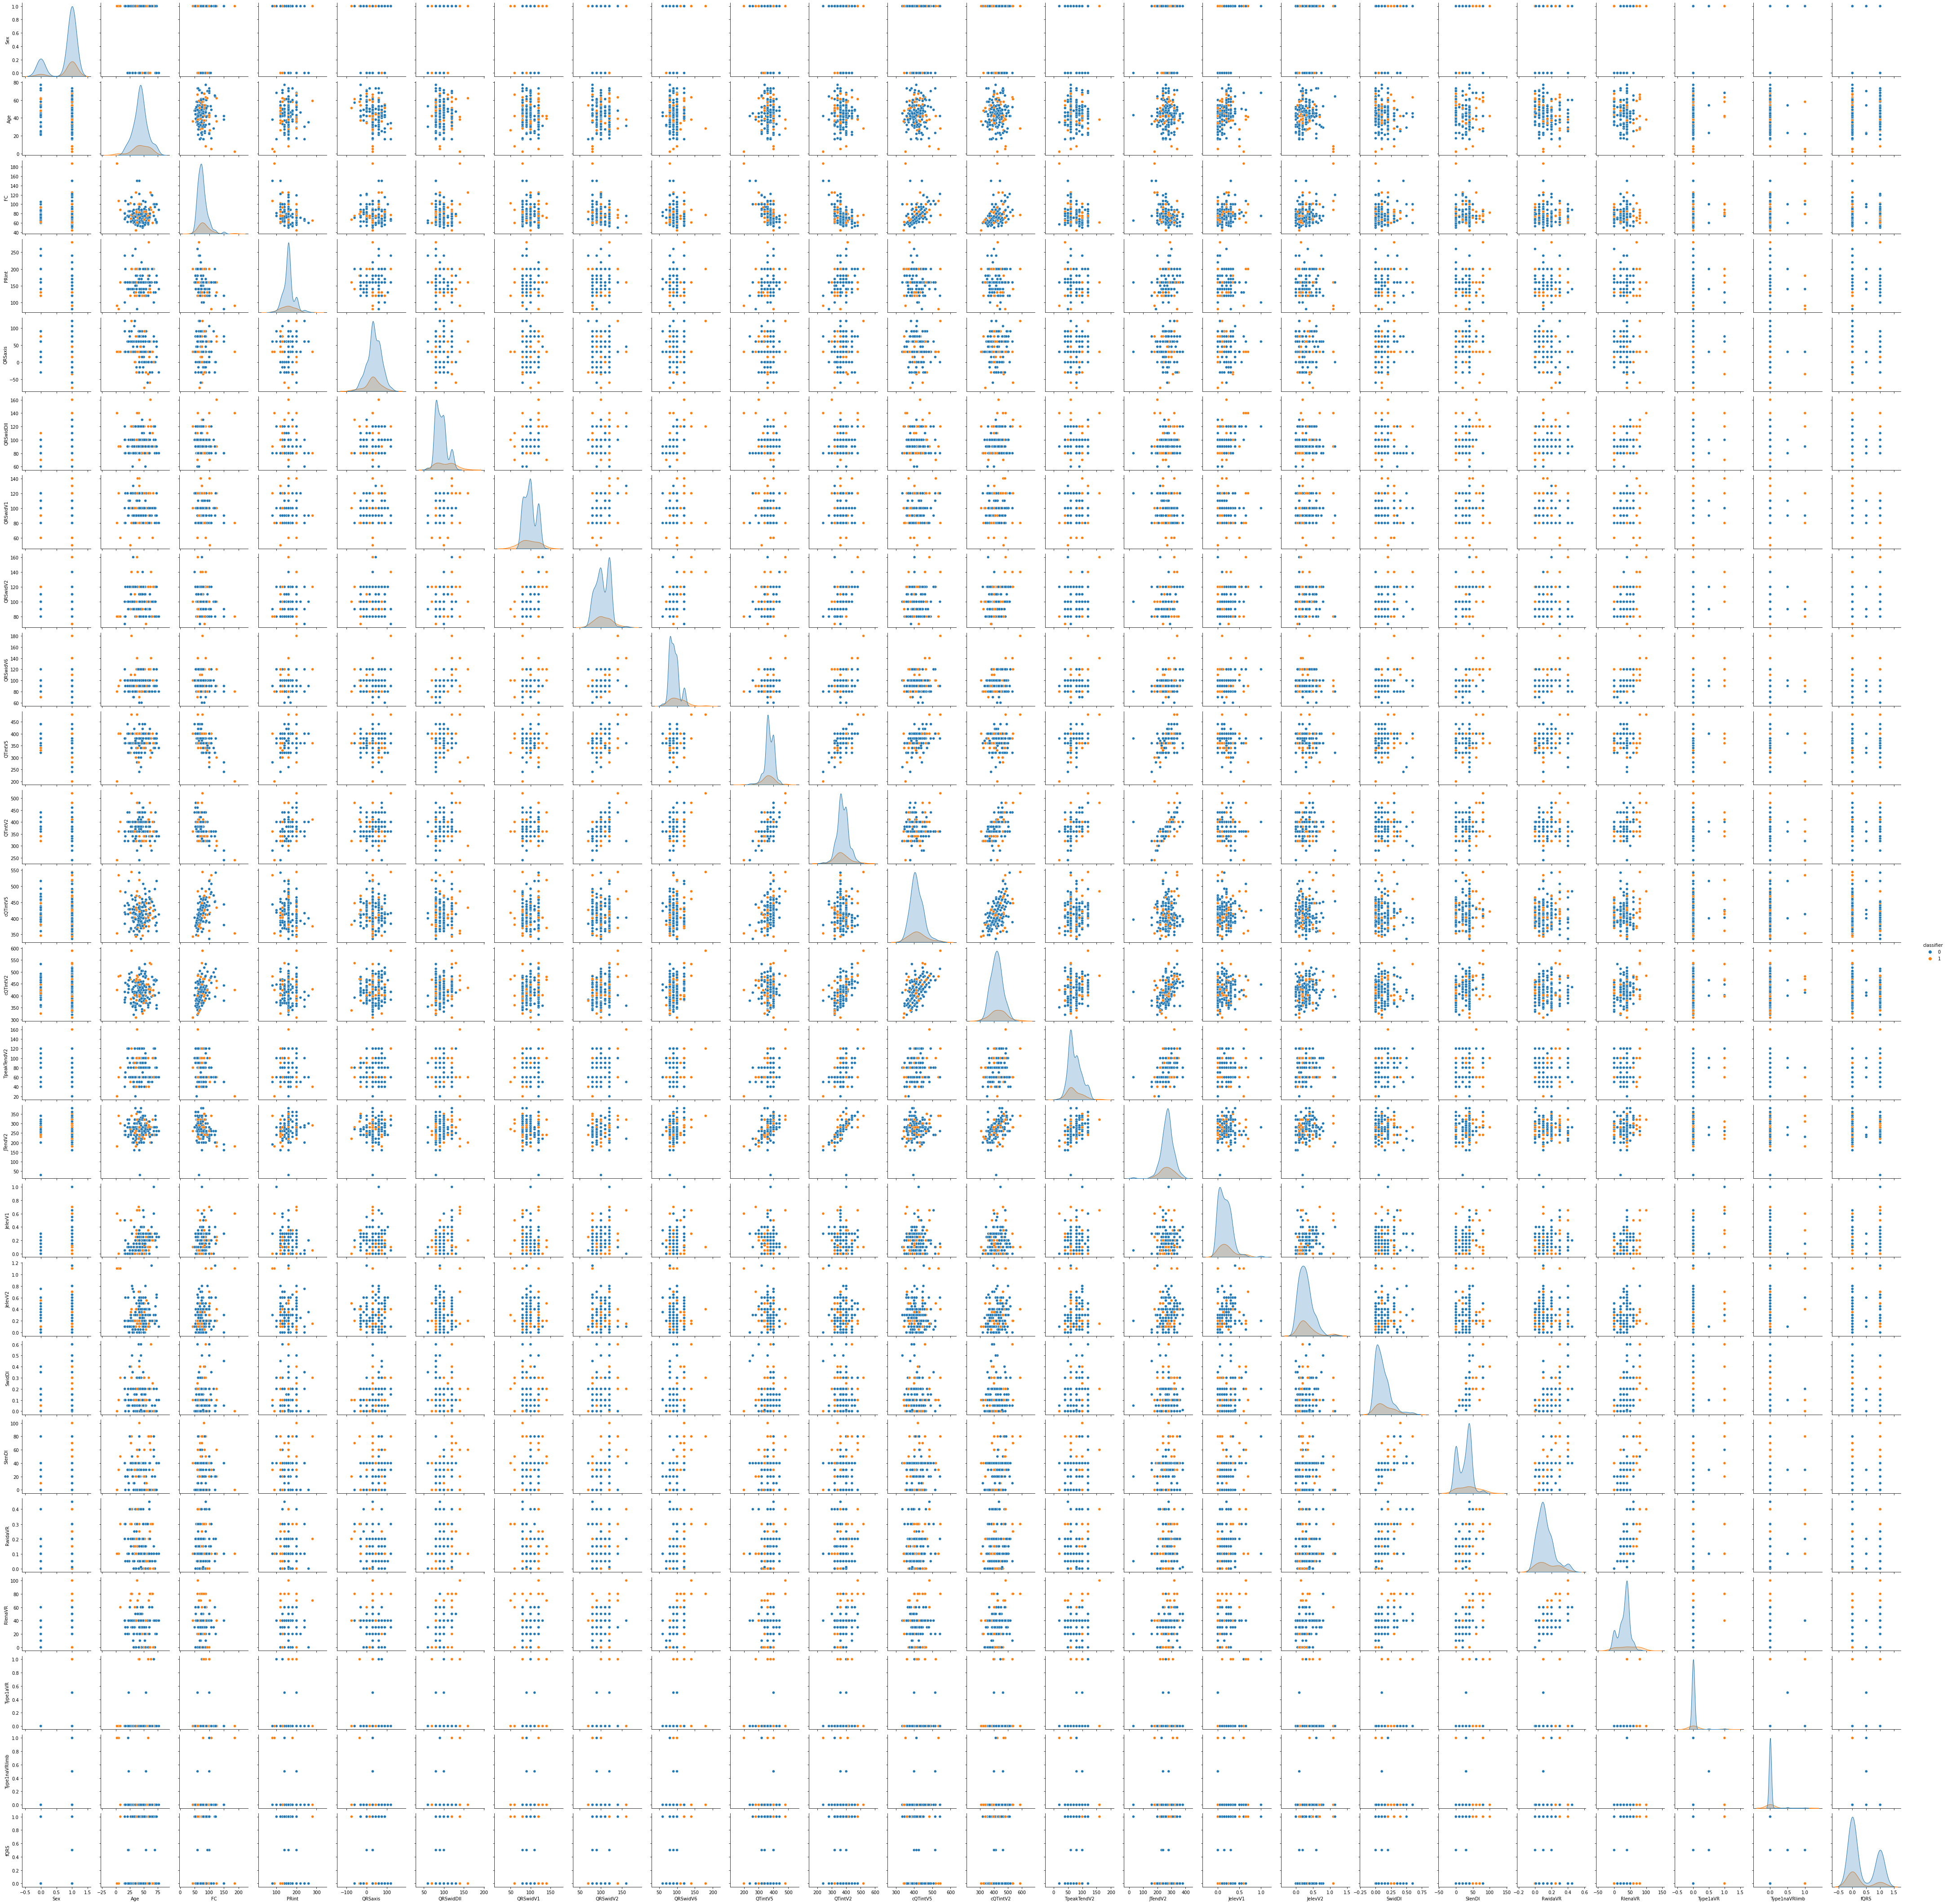

In [18]:
sns.pairplot(data=df, hue='classifier')

Text(0.5, 0, 'Event')

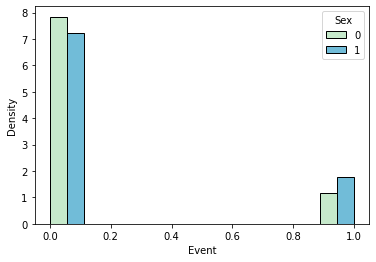

In [35]:
# countplot for event, grouped by sex
sns.histplot(x='classifier', data=df, hue='Sex', multiple="dodge", stat='density', common_norm=False, palette='GnBu')
plt.xlabel('Event')

# more men have events than women?

In [36]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 206
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            196 non-null    int64  
 1   Age            196 non-null    float64
 2   FC             196 non-null    int64  
 3   PRint          196 non-null    float64
 4   QRSaxis        196 non-null    float64
 5   QRSwidDII      196 non-null    float64
 6   QRSwidV1       196 non-null    int64  
 7   QRSwidV2       196 non-null    int64  
 8   QRSwidV6       196 non-null    float64
 9   QTintV5        196 non-null    float64
 10  QTintV2        196 non-null    int64  
 11  cQTintV5       196 non-null    float64
 12  cQTintV2       196 non-null    int64  
 13  TpeakTendV2    196 non-null    float64
 14  JTendV2        196 non-null    int64  
 15  JelevV1        196 non-null    float64
 16  JelevV2        196 non-null    float64
 17  SwidDI         196 non-null    float64
 18  SlenDI    

In [37]:
# train-test split
X = df.drop(columns='classifier')
y = df['classifier']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [44]:
clf_1 = MLPClassifier(hidden_layer_sizes=(50), activation='relu', random_state=42).fit(X_trainscaled, y_train)
y_pred=clf_1.predict(X_testscaled)
print("Accuracy of the model: ", clf_1.score(X_testscaled, y_test))
print(classification_report(y_test, y_pred))

Accuracy of the model:  0.725
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.17      0.14      0.15         7

    accuracy                           0.73        40
   macro avg       0.50      0.50      0.49        40
weighted avg       0.71      0.72      0.72        40



Confusion Matrix: 
 1 6 
 5 28


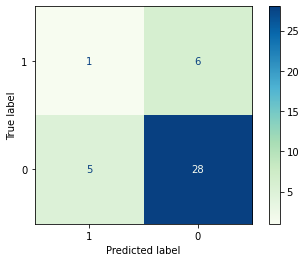

In [63]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).reshape(-1)
print('Confusion Matrix: \n', tp, fn, '\n', fp, tn)
plot_confusion_matrix(clf_1, X_testscaled, y_test, labels=[1,0], cmap='GnBu')  
plt.show()

In [64]:
clf_2 = MLPClassifier(hidden_layer_sizes=(75,150,25), activation='relu', random_state=42).fit(X_trainscaled, y_train)
y_pred=clf_2.predict(X_testscaled)
print("Accuracy of the model: ", clf_2.score(X_testscaled, y_test))
print(classification_report(y_test, y_pred))

Accuracy of the model:  0.725
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.00      0.00      0.00         7

    accuracy                           0.73        40
   macro avg       0.40      0.44      0.42        40
weighted avg       0.66      0.72      0.69        40



Confusion Matrix: 
 0 7 
 4 29


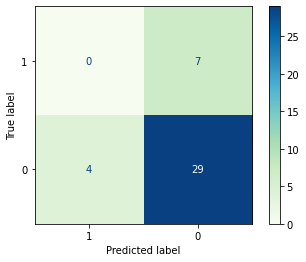

In [65]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).reshape(-1)
print('Confusion Matrix: \n', tp, fn, '\n', fp, tn)
plot_confusion_matrix(clf_2, X_testscaled, y_test, labels=[1,0], cmap='GnBu')  
plt.show()

In [66]:
clf_3 = MLPClassifier(hidden_layer_sizes=(150,25,150), activation='relu', random_state=42).fit(X_trainscaled, y_train)
y_pred=clf_3.predict(X_testscaled)
print("Accuracy of the model: ", clf_3.score(X_testscaled, y_test))
print(classification_report(y_test, y_pred))

Accuracy of the model:  0.75
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.29      0.29      0.29         7

    accuracy                           0.75        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.75      0.75      0.75        40



Confusion Matrix: 
 2 5 
 5 28


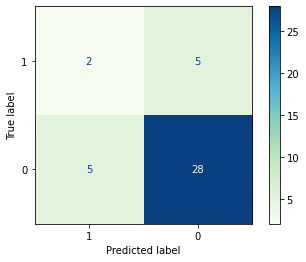

In [67]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).reshape(-1)
print('Confusion Matrix: \n', tp, fn, '\n', fp, tn)
plot_confusion_matrix(clf_3, X_testscaled, y_test, labels=[1,0], cmap='GnBu')  
plt.show()